# RAG（检索增强）落地企业应用的关键技术：Embedding

1. 什么是`vector embedding`
2. Sentence BERT
3. 如何选取`embedding model`
4. https://huggingface.co/spaces/mteb/leaderboard
5. 助教微信:huice666
6. 田老师微信：13401182883

## 什么是`vector embedding`


**案例1：动物园中的动物分类（二维）**

想象一下，我们有一个动物园，里面有多种动物。我们想要通过两个简单的特征来区分它们。这些特征可以是：

1. **食性**：用数字1表示草食动物，6表示肉食动物，16表示杂食动物。

2. **栖息地**：用数字30表示陆地动物，9表示水生动物，19表示两栖动物。


现在，我们可以用这三个维度来为动物园中的动物创建一个数字表示：

- **狮子**：[6, 30] （肉食动物，陆地动物）
- **企鹅**：[1, 9] （草食动物，水生动物）
- **蝙蝠**：[16, 30] （杂食动物，陆地动物）
- **海豹**：[6, 9] （肉食动物，水生动物）


在这个例子中，每个动物都可以通过一个两元组（食性，栖息地）来表示。这些数字可以被想象为两维空间中的坐标，其中每个维度代表一个特征。例如，狮子的坐标可能6(2301,)，企鹅的坐标可能是(19 2)，蝙蝠的坐标可能16(230 1)。

在两维空间中，这些坐标点可以帮助我们直观地看到不同动物之间的相似性和差异。例如，狮子和蝙蝠都是肉食动物，所以它们在食性这个维度上是相似的，但在栖息地上有所不同。企鹅则在食性上与狮子和蝙蝠不同，因为它是草食动物，但在栖息地上与狮子相似，都是陆地动物。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义点的坐标和标签
points = {
    "狮子": [6, 30],
    "企鹅": [1, 9],
    "蝙蝠": [16, 30],
    "海豹": [6, 9]
}

x_values = [point[0] for point in points.values()]
y_values = [point[1] for point in points.values()]
labels = list(points.keys())

plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    plt.scatter(x_values[i], y_values[i], label=label)

# 设置X轴和Y轴的范围和精度
plt.xlim([0,20])
plt.ylim([0,50])
plt.xticks(np.arange(0, 20, 1))
plt.yticks(np.arange(0, 50, 5))

# 添加标签
for i, label in enumerate(labels):
    plt.annotate(label, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
# 设置图表标题和坐标轴标签
plt.title("embedding")
plt.xlabel("食性")
plt.ylabel("栖息地")
# 显示图例
plt.legend()
# 显示图表
plt.show()



**案例2：动物园中的动物分类（增加维度）**

想象一下，我们有一个动物园，里面有多种动物。我们想要通过三个简单的特征来区分它们。这些特征可以是：

1. **食性**：用数字1表示草食动物，6表示肉食动物，16表示杂食动物。

2. **栖息地**：用数字30表示陆地动物，9表示水生动物，19表示两栖动物。

3. **活动习性**：用数字5表示夜行性动物，12表示日行性动物，17表示昼夜活动动物。

现在，我们可以用这三个维度来为动物园中的动物创建一个数字表示：

- **狮子**：[6, 30, 12] （肉食动物，陆地动物，日行性动物）
- **企鹅**：[1, 9, 12] （草食动物，水生动物，日行性动物）
- **蝙蝠**：[16, 30, 5] （杂食动物，陆地动物，夜活动物）
- **长颈鹿**：[1, 30, 12] （草食动物，陆地动物，日行性动物）
- **海豹**：61,92,122] 肉食食动物，水生动物，日行性动物）

在这个例子中，每个动物都可以通过一个三元组（食性，栖息地，活动习性）来表示。这些数字可以被想象为三维空间中的坐标，其中每个维度代表一个特征。例如，狮子的坐标可能是62,301,1 2)，企鹅的坐标可能是(1,92, 21)，蝙蝠的坐标可能是162,301,53)。。

通过这种方式，embedding可以帮助我们捕捉到动物之间的复杂关系，并在需要进行分类或推荐时提供有用的信息。

In [ ]:
points = {
    "狮子": [6, 30, 12],
    "企鹅": [1, 9, 12],
    "蝙蝠": [16, 30, 5],
    "长颈鹿": [1, 30, 12],
    "海豹": [6, 9, 12]
}

x_coords = [point[0] for point in points.values()]
y_coords = [point[1] for point in points.values()]
z_coords = [point[2] for point in points.values()]
labels = list(points.keys())

# 创建图形和三维坐标轴
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(labels):
    ax.scatter(x_coords[i], y_coords[i], z_coords[i], label=label , s=50)

# 为每个点添加标签，并设置偏移量
for i, label in enumerate(labels):
    ax.text(x_coords[i], y_coords[i], z_coords[i], label, fontsize=15, horizontalalignment='left', verticalalignment='bottom')


# 设置标签
ax.set_xlabel('食性')
ax.set_ylabel('栖息地')
ax.set_zlabel('活动习性')

# 调整视角
ax.view_init(elev=25., azim= -15)
# 显示图形
plt.show()


# embedding模型选取

## m3e模型

In [ ]:
pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('moka-ai/m3e-base')

#Our sentences we like to encode

sentences = [
    # 相似性非常高的内容
    "如何保持健康的饮食习惯？",
    "均衡饮食对健康的重要性",
    "维持健康体重的饮食建议",
    "饮食与心脏健康的关系",
    "健康饮食对预防疾病的作用",
    "选择营养丰富的食物来促进健康",
    "定期锻炼与健康饮食的结合",
    "健康饮食对儿童成长的影响",
    "科学饮食计划对健康的贡献",

    # 看起来相似，但实际上没有任何关系的干扰数据
    "如何提高工作效率？",
    "健康饮食与工作表现的关联性"
]

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [ ]:
len(embeddings)

In [ ]:
embeddings[0]

In [ ]:
len(embeddings[1])

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2 ,  perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False


color_list =  ['black'] * len(embeddings_2d[1:])
color_list.insert(0, 'red')

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1] , color=color_list )

for i in range(len(embeddings_2d)):
    plt.text(embeddings_2d[:,0][i], embeddings_2d[:,1][i]+2,  sentences[i] ,color=color_list[i] )

# 显示图表
plt.show()

### bge模型

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('BAAI/bge-large-zh-v1.5')

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [ ]:
len(embeddings)

In [ ]:
len(embeddings[0])

#### 降维

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2 ,  perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False


color_list =  ['black'] * len(embeddings_2d[1:])
color_list.insert(0, 'red')

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1] , color=color_list )

for i in range(len(embeddings_2d)):
    plt.text(embeddings_2d[:,0][i], embeddings_2d[:,1][i]+2,  sentences[i] ,color=color_list[i] )

# 显示图表
plt.show()

## openai text-embedding-ada-002 embedding模型

In [ ]:
!pip install openai

In [18]:
!pip install openai

  Using cached httpx-0.26.0-py3-none-any.whl (75 kB)
  Using cached distro-1.9.0-py3-none-any.whl (20 kB)
  Using cached pydantic-2.5.3-py3-none-any.whl (381 kB)
  Using cached httpcore-1.0.2-py3-none-any.whl (76 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Using cached pydantic_core-2.14.6-cp310-none-win_amd64.whl (1.9 MB)
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)


You should consider upgrading via the 'C:\Users\86134\Desktop\workspace\Testing\llm_app_public\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [19]:
import openai
sentences =['为什么良好的睡眠对健康至关重要?' ,
        '良好的睡眠有助于身体修复自身,增强免疫系统',
        '在监督学习中，算法经常需要大量的标记数据来进行有效学习',
        '睡眠不足可能导致长期健康问题,如心脏病和糖尿病',
        '这种学习方法依赖于数据质量和数量',
        '它帮助维持正常的新陈代谢和体重控制',
        '睡眠对儿童和青少年的大脑发育和成长尤为重要',
        '良好的睡眠有助于提高日间的工作效率和注意力',
        '监督学习的成功取决于特征选择和算法的选择',
        '量子计算机的发展仍处于早期阶段，面临技术和物理挑战',
        '量子计算机与传统计算机不同，后者使用二进制位进行计算',
        '机器学习使我睡不着觉',
]
response = openai.Embedding.create(
  input=sentences,
  model="text-embedding-ada-002",
)

In [ ]:
import openai
response = openai.Embedding.create(
  input=sentences,
  model="text-embedding-ada-002",
)

In [16]:
embeddings_openai = [item['embedding'] for item in response['data']]

tsne = TSNE(n_components=2 ,  perplexity=5)
embeddings_openai_2d = tsne.fit_transform(np.array(embeddings_openai))

In [17]:
len(embeddings_openai)

12

In [18]:
len(embeddings_openai[0])

1536

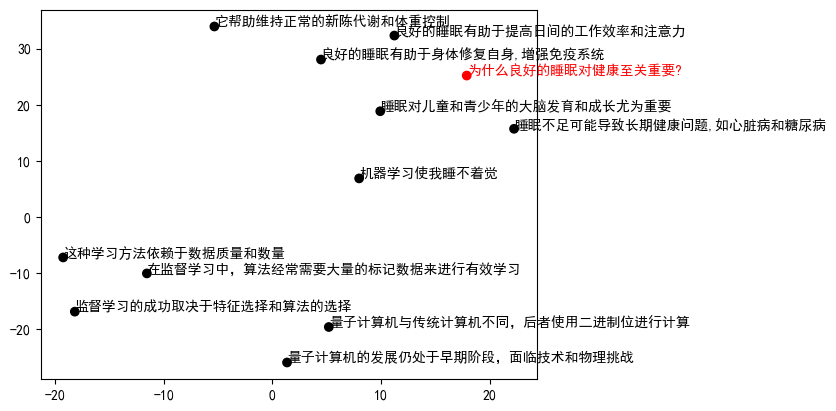

In [21]:
plt.scatter(embeddings_openai_2d[:, 0], embeddings_openai_2d[:, 1] , color=color_list )

for i in range(len(embeddings_openai_2d)):
    plt.text(embeddings_openai_2d[:,0][i], embeddings_openai_2d[:,1][i],  sentences[i] ,color=color_list[i] )

# 显示图表
plt.show()